<a href="https://colab.research.google.com/github/leekh8/Colaboratory/blob/main/ex04_%EC%9D%B4%EC%A7%84%EB%B6%84%EB%A5%98_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd '/content/drive/MyDrive/Colab Notebooks/Colaboratory/AISchool/'

/content/drive/MyDrive/Colab Notebooks/Colaboratory/AISchool


In [ ]:
# @title # **직접 수집한 사진 데이터로 이진분류 딥러닝 모델 만들기**
!pwd
!unzip ./Data/img/Class\ 1-samples.zip -d ./Data/img/Class1
!unzip ./Data/img/Class\ 2-samples.zip -d ./Data/img/Class2

/content/drive/MyDrive/Colab Notebooks/Colaboratory/AISchool
Archive:  ./Data/img/Class 1-samples.zip
replace ./Data/img/Class1/0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  ./Data/img/Class 2-samples.zip
replace ./Data/img/Class2/0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [2]:
# @title 데이터 로딩
import cv2 # 파이썬 이미지 라이브러리 대표
import os # 파이썬으로 시스템 정보 확인, 제어하는 라이브러리
import matplotlib.pyplot as plt # 시각화 라이브러리
import numpy as np
from tqdm import tqdm

In [3]:
# @title 특정 폴더 밑에 있는 파일이나 폴더명 얻어내기
class1_file_names = os.listdir("./Data/img/Class1")
class1_file_names

['221.jpg',
 '66.jpg',
 '232.jpg',
 '49.jpg',
 '11.jpg',
 '88.jpg',
 '129.jpg',
 '4.jpg',
 '242.jpg',
 '63.jpg',
 '77.jpg',
 '136.jpg',
 '193.jpg',
 '217.jpg',
 '224.jpg',
 '207.jpg',
 '32.jpg',
 '188.jpg',
 '98.jpg',
 '57.jpg',
 '132.jpg',
 '162.jpg',
 '179.jpg',
 '10.jpg',
 '145.jpg',
 '170.jpg',
 '80.jpg',
 '75.jpg',
 '70.jpg',
 '126.jpg',
 '245.jpg',
 '163.jpg',
 '83.jpg',
 '187.jpg',
 '119.jpg',
 '210.jpg',
 '186.jpg',
 '236.jpg',
 '36.jpg',
 '154.jpg',
 '148.jpg',
 '140.jpg',
 '177.jpg',
 '44.jpg',
 '160.jpg',
 '5.jpg',
 '16.jpg',
 '6.jpg',
 '192.jpg',
 '147.jpg',
 '220.jpg',
 '213.jpg',
 '164.jpg',
 '199.jpg',
 '229.jpg',
 '201.jpg',
 '249.jpg',
 '240.jpg',
 '47.jpg',
 '40.jpg',
 '156.jpg',
 '43.jpg',
 '65.jpg',
 '237.jpg',
 '8.jpg',
 '107.jpg',
 '93.jpg',
 '113.jpg',
 '48.jpg',
 '62.jpg',
 '56.jpg',
 '125.jpg',
 '71.jpg',
 '137.jpg',
 '114.jpg',
 '17.jpg',
 '151.jpg',
 '96.jpg',
 '196.jpg',
 '247.jpg',
 '106.jpg',
 '165.jpg',
 '60.jpg',
 '169.jpg',
 '202.jpg',
 '157.jpg',
 '150

In [4]:
class2_file_names = os.listdir("./Data/img/Class2")
class2_file_names

['45.jpg',
 '12.jpg',
 '122.jpg',
 '56.jpg',
 '197.jpg',
 '170.jpg',
 '93.jpg',
 '7.jpg',
 '25.jpg',
 '3.jpg',
 '92.jpg',
 '22.jpg',
 '0.jpg',
 '123.jpg',
 '166.jpg',
 '46.jpg',
 '173.jpg',
 '246.jpg',
 '179.jpg',
 '245.jpg',
 '218.jpg',
 '117.jpg',
 '23.jpg',
 '24.jpg',
 '42.jpg',
 '205.jpg',
 '214.jpg',
 '58.jpg',
 '183.jpg',
 '177.jpg',
 '169.jpg',
 '212.jpg',
 '89.jpg',
 '150.jpg',
 '5.jpg',
 '222.jpg',
 '19.jpg',
 '235.jpg',
 '90.jpg',
 '100.jpg',
 '41.jpg',
 '192.jpg',
 '85.jpg',
 '209.jpg',
 '80.jpg',
 '15.jpg',
 '106.jpg',
 '229.jpg',
 '53.jpg',
 '198.jpg',
 '136.jpg',
 '2.jpg',
 '145.jpg',
 '32.jpg',
 '55.jpg',
 '83.jpg',
 '91.jpg',
 '120.jpg',
 '193.jpg',
 '199.jpg',
 '110.jpg',
 '69.jpg',
 '65.jpg',
 '40.jpg',
 '161.jpg',
 '36.jpg',
 '99.jpg',
 '220.jpg',
 '240.jpg',
 '187.jpg',
 '215.jpg',
 '57.jpg',
 '128.jpg',
 '112.jpg',
 '51.jpg',
 '16.jpg',
 '115.jpg',
 '68.jpg',
 '213.jpg',
 '189.jpg',
 '248.jpg',
 '70.jpg',
 '8.jpg',
 '121.jpg',
 '30.jpg',
 '37.jpg',
 '94.jpg',
 '252

In [5]:
# @title 사진 한장 열기
img_path = "./Data/img/Class1/" + class1_file_names[0]
img_path

'./Data/img/Class1/221.jpg'

In [6]:
img_data = cv2.imread(img_path)
img_data_rgb = cv2.cvtColor(img_data, cv2.COLOR_BGR2RGB)
img_data.shape

(224, 224, 3)

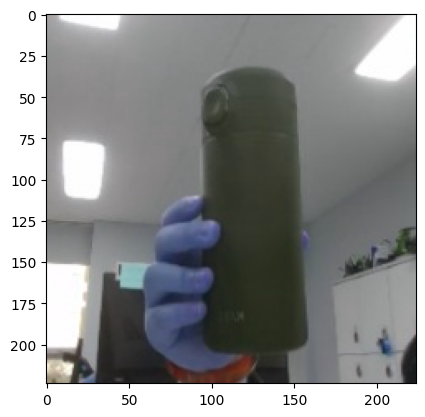

In [7]:
plt.imshow(img_data)

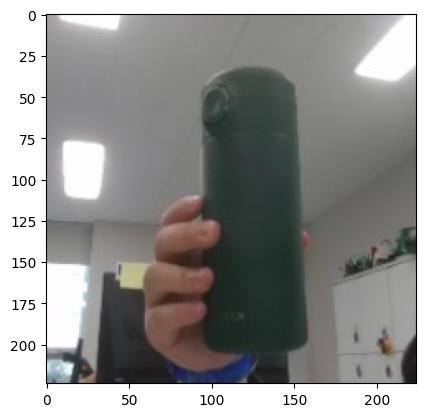

In [8]:
plt.imshow(img_data_rgb)

In [9]:
imgs_class1 = [] # 전체 이미지가 들어갈 리스트
for fname in class1_file_names:
  img_path = "./Data/img/Class1/" + fname
  img_data = cv2.imread(img_path)
  img_data_rgb = cv2.cvtColor(img_data, cv2.COLOR_BGR2RGB)
  imgs_class1.append(img_data_rgb)

# 전체 리스트를 numpy 타입으로 변경
imgs_class1 = np.array(imgs_class1)

In [10]:
imgs_class1.shape

(252, 224, 224, 3)

In [11]:
imgs_class2 = [] # 전체 이미지가 들어갈 리스트
for fname in tqdm(class2_file_names):
  img_path = "./Data/img/Class2/" + fname
  img_data = cv2.imread(img_path)
  img_data_rgb = cv2.cvtColor(img_data, cv2.COLOR_BGR2RGB)
  imgs_class2.append(img_data_rgb)

# 전체 리스트를 numpy 타입으로 변경
imgs_class2 = np.array(imgs_class2)

100%|██████████| 255/255 [00:56<00:00,  4.49it/s]


In [12]:
imgs_class2.shape

(255, 224, 224, 3)

# 모델링
- 모델 설계
- 모델 학습
- 모델 예측
- 모델 평가

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# @title class1과 class2를 합쳐 문제와 답 만들기
X = np.concatenate([imgs_class1, imgs_class2])
X.shape

(507, 224, 224, 3)

In [15]:
y = np.array([0] * 252 + [1] * 255)
y.shape

(507,)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=904, test_size=0.2)

In [17]:
from tensorflow.keras.models import Sequential # 신경망의 뼈대
from tensorflow.keras.layers import Dense, InputLayer, Flatten

In [18]:
# @title 모델 설계
model = Sequential() # 뼈대 생성
# 입력층
model.add(InputLayer(input_shape = (224, 224, 3)))
model.add(Flatten()) # 들어오는 데이터를 1차원으로 평평하게 펴줌
# 중간층
model.add(Dense(units = 128, activation = "sigmoid"))
model.add(Dense(units = 256, activation = "sigmoid"))
model.add(Dense(units = 128, activation = "sigmoid"))
# 출력층
model.add(Dense(1, activation = "sigmoid"))

In [19]:
# @title 모델 학습
model.compile(loss = "binary_crossentropy", optimizer = "sgd", metrics = ['accuracy'])
my_history = model.fit(X_train, y_train, validation_split = 0.2, epochs = 100)

Epoch 1/100
11/11 [==============================] - 3s 167ms/step - loss: 0.6940 - accuracy: 0.4846 - val_loss: 0.7027 - val_accuracy: 0.4691
Epoch 2/100
11/11 [==============================] - 2s 140ms/step - loss: 0.6931 - accuracy: 0.5278 - val_loss: 0.7081 - val_accuracy: 0.4691
Epoch 3/100
11/11 [==============================] - 3s 249ms/step - loss: 0.6930 - accuracy: 0.5278 - val_loss: 0.7074 - val_accuracy: 0.4691
Epoch 4/100
11/11 [==============================] - 2s 137ms/step - loss: 0.6933 - accuracy: 0.5278 - val_loss: 0.6952 - val_accuracy: 0.4691
Epoch 5/100
11/11 [==============================] - 1s 136ms/step - loss: 0.6926 - accuracy: 0.5278 - val_loss: 0.7013 - val_accuracy: 0.4691
Epoch 6/100
11/11 [==============================] - 2s 170ms/step - loss: 0.6923 - accuracy: 0.5278 - val_loss: 0.6978 - val_accuracy: 0.4691
Epoch 7/100
11/11 [==============================] - 3s 243ms/step - loss: 0.6928 - accuracy: 0.5278 - val_loss: 0.6972 - val_accuracy: 0.4691

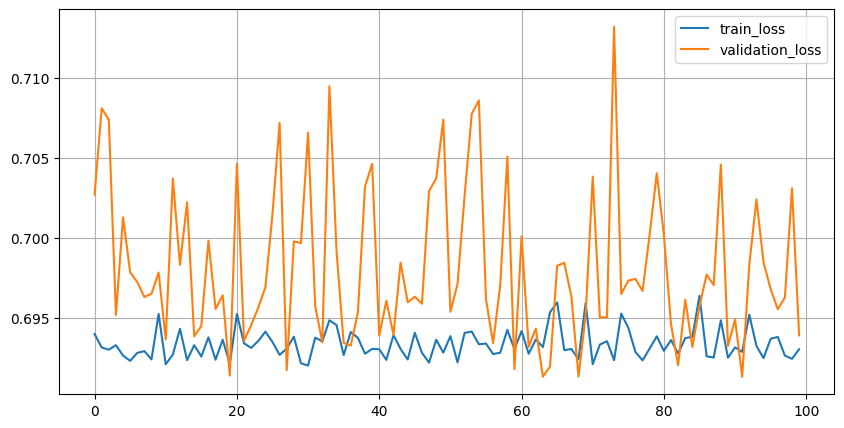

In [20]:
# @title 학습 결과 시각화
plt.figure(figsize = (10, 5))
plt.plot(my_history.history['loss'], label = 'train_loss')
plt.plot(my_history.history['val_loss'], label = 'validation_loss')
plt.grid()
plt.legend()
plt.show()

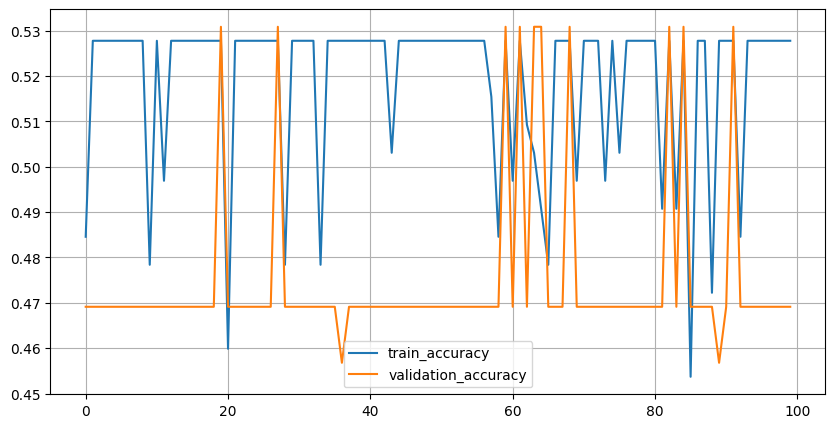

In [21]:
# @title 학습 결과 시각화
plt.figure(figsize = (10, 5))
plt.plot(my_history.history['accuracy'], label = 'train_accuracy')
plt.plot(my_history.history['val_accuracy'], label = 'validation_accuracy')
plt.grid()
plt.legend()
plt.show()

In [22]:
# @title 다시 모델 설계
model = Sequential() # 뼈대 생성
# 입력층
model.add(InputLayer(input_shape = (224, 224, 3)))
model.add(Flatten()) # 들어오는 데이터를 1차원으로 평평하게 펴줌
# 중간층
model.add(Dense(units = 128, activation = "sigmoid"))
model.add(Dense(units = 256, activation = "sigmoid"))
model.add(Dense(units = 128, activation = "sigmoid"))
# 출력층
model.add(Dense(1, activation = "sigmoid"))

# 모델 학습
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ['accuracy'])
my_history = model.fit(X_train, y_train, validation_split = 0.2, epochs = 100)

Epoch 1/100
11/11 [==============================] - 6s 368ms/step - loss: 0.7040 - accuracy: 0.4969 - val_loss: 0.6957 - val_accuracy: 0.4691
Epoch 2/100
11/11 [==============================] - 4s 330ms/step - loss: 0.7021 - accuracy: 0.4599 - val_loss: 0.6946 - val_accuracy: 0.4691
Epoch 3/100
11/11 [==============================] - 4s 341ms/step - loss: 0.6952 - accuracy: 0.5278 - val_loss: 0.6966 - val_accuracy: 0.4691
Epoch 4/100
11/11 [==============================] - 5s 470ms/step - loss: 0.6918 - accuracy: 0.5278 - val_loss: 0.7097 - val_accuracy: 0.4691
Epoch 5/100
11/11 [==============================] - 4s 334ms/step - loss: 0.7098 - accuracy: 0.4599 - val_loss: 0.6960 - val_accuracy: 0.4691
Epoch 6/100
11/11 [==============================] - 4s 331ms/step - loss: 0.7019 - accuracy: 0.5278 - val_loss: 0.7032 - val_accuracy: 0.4691
Epoch 7/100
11/11 [==============================] - 5s 449ms/step - loss: 0.7012 - accuracy: 0.4660 - val_loss: 0.6980 - val_accuracy: 0.4691

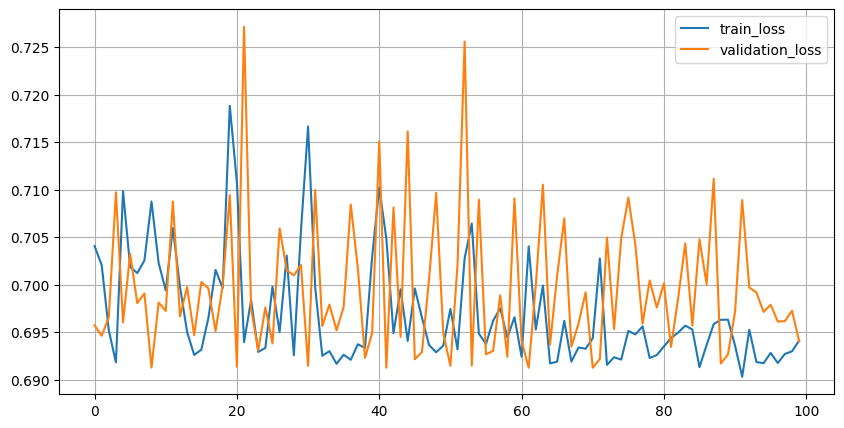

In [23]:
# @title 학습 결과 시각화
plt.figure(figsize = (10, 5))
plt.plot(my_history.history['loss'], label = 'train_loss')
plt.plot(my_history.history['val_loss'], label = 'validation_loss')
plt.grid()
plt.legend()
plt.show()

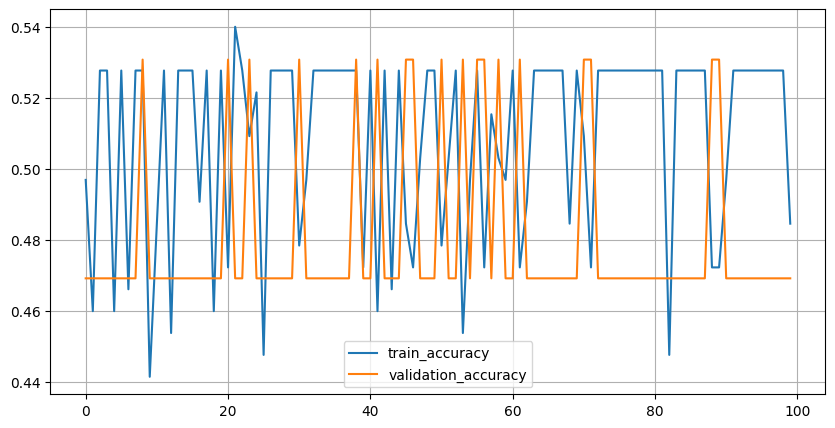

In [24]:
plt.figure(figsize = (10, 5))
plt.plot(my_history.history['accuracy'], label = 'train_accuracy')
plt.plot(my_history.history['val_accuracy'], label = 'validation_accuracy')
plt.grid()
plt.legend()
plt.show()

In [25]:
# @title 모델 평가
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 49ms/step - loss: 0.6945 - accuracy: 0.4510


[0.6944887638092041, 0.45098039507865906]

In [27]:
# @title 모델 활용
img_path = "./Data/img/Class1" + class1_file_names[100]
img_data = cv2.imread(img_path)
img_data_rgb = cv2.cvtColor(img_data, cv2.COLOR_BGR2RGB)

model.predict(img_data_rgb.reshape(-1, 224, 224, 3))

error: ignored